# Neural Network - Part 1

- Graphical reprasentation of XOR problem

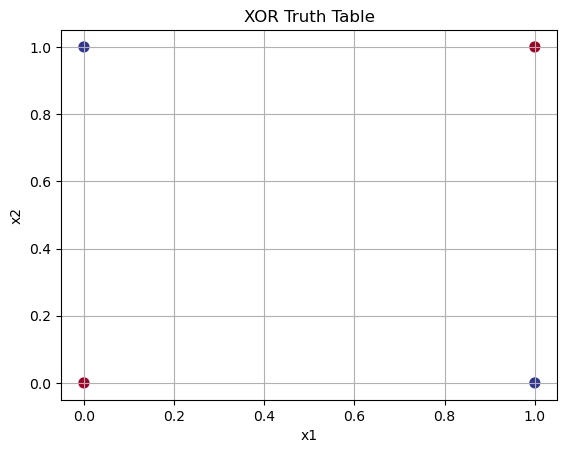

In [67]:
import matplotlib.pyplot as plt

# XOR table data
data = {
    'x1': [0, 0, 1, 1],
    'x2': [0, 1, 0, 1],
    'y': [0, 1, 1, 0]
}

# Plotting XOR table
scatter = plt.scatter(data['x1'], data['x2'], c=data['y'], cmap=plt.cm.RdYlBu, marker='o', s=50)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Truth Table')
plt.grid(True)

plt.show()


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR table data
data = {
    'x1': np.array([0, 0, 1, 1]),
    'x2': np.array([0, 1, 0, 1]),
    'y': np.array([0, 1, 1, 0])
}

# Initialize variables
np.random.seed(42)
k = 150
alpha = 5

# Creating input matrix X
X = np.array([data['x1'], data['x2']]).T

# Adding bias to X
X = np.insert(X, 2, 1, axis=1) 

# Creating output matrix y
y = data['y'].reshape(-1, 1)

# Initializing weight W1 and W2
W1 = 2 * np.random.random((3, 2)) - 1
W2 = 2 * np.random.random((3, 1)) - 1

costs = np.zeros(k)

In [69]:
# Stochastic Gradient Descent
for epoch in range(k):
    cost_sum = 0

    index = np.arange(len(X))
    np.random.shuffle(index)
    X_shuffled = X[index]
    y_shuffled = y[index]

    for i in range(len(X_shuffled)):
        # Forward propagation
        input_layer = X_shuffled[i]
        hidden_layer_input = np.dot(input_layer, W1)
        hidden_layer_output = sigmoid(hidden_layer_input)
        hidden_layer_output = np.insert(hidden_layer_output, 2, 1)

        output_layer_input = np.dot(hidden_layer_output, W2)
        output_layer_output = sigmoid(output_layer_input)

        # Calculating cost error
        error = y_shuffled[i] - output_layer_output
        cost_sum += np.abs(error)

        # Backpropagation
        output = error * sigmoid_derivative(output_layer_output)
        hidden_layer_delta = output.dot(W2.T) * sigmoid_derivative(hidden_layer_output)

        # weights update
        W2 += alpha * hidden_layer_output.reshape(-1, 1) * output
        W1 += alpha * input_layer.reshape(-1, 1) * hidden_layer_delta[:-1]

    # average cost for the epochs
    costs[epoch] = cost_sum / len(X_shuffled)

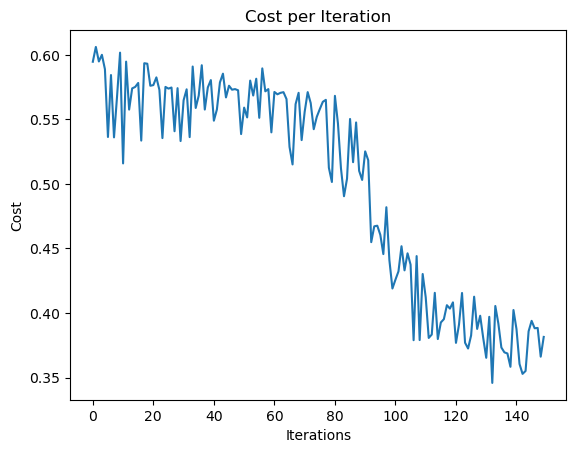

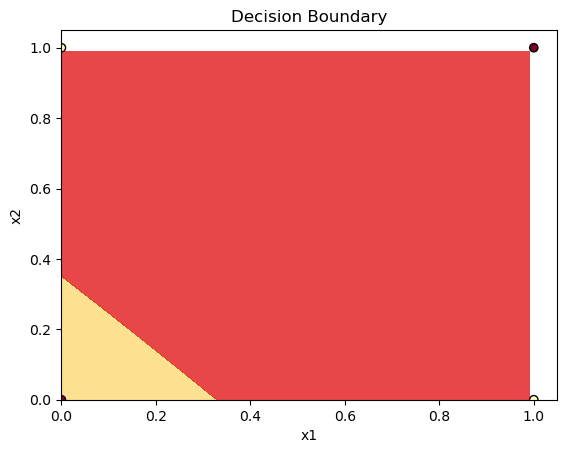

In [70]:
# Plot for the cost per iteration
plt.plot(range(k), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.show()

# Plot for the decision boundary
h = 0.01
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# feature matrix
feature_matrix = np.c_[xx.ravel(), yy.ravel()]
feature_matrix = np.insert(feature_matrix, 2, 1, axis=1)

# Forward propagation to predict classes for each pair of features
hidden_layer_prediction = sigmoid(np.dot(feature_matrix, W1))
hidden_layer_prediction = np.insert(hidden_layer_prediction, 2, 1, axis=1)
final_prediction = sigmoid(np.dot(hidden_layer_prediction, W2))


prediction_grid = final_prediction.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, prediction_grid, cmap=plt.cm.YlOrRd, levels=[0, 0.5, 1], alpha=0.8)

scatter = plt.scatter(data['x1'], data['x2'], c=data['y'], cmap=plt.cm.YlOrRd, edgecolors='k')
scatter.set_cmap(plt.cm.YlOrRd_r)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')

plt.show()


# Part-2 Experimentation with the Number of Hidden Neurons in the Hidden Layer

1. What is your understanding of the above figure?

- The graph of costs indicates that the model is getting better and learning more as it goes through different epochs, shown by the decreasing cost. This is especially important when dealing with complex tasks like approximating the XOR function.
- The decreasing cost means the model is becoming better at understanding the hidden patterns in the data. As the cost goes down, it shows that the model is steadily improving its ability to make accurate predictions on the training data, highlighting that the training process is working well in enhancing its overall performance.


- The decision boundary graph shows how our model is trying to figure out which group (class) each point belongs to. The red and yellow areas on the graph represent where the model thinks different groups are. It's crucial to understand that the XOR problem is a bit tricky because it involves non-straightforward relationships between the input values. Using only one neuron in the hidden layer might not be enough to catch these complex relationships in the data.

2. Do you think the output is correct, Justify your answer?

The current model, with just one hidden neuron, might have difficulty accurately understanding the XOR pattern. XOR involves complex relationships, and usually, a more advanced model with additional neurons or layers is needed for better results. To improve the model's performance, it would be a good idea to try different configurations with more hidden neurons or layers.

# Train the Neural Network to Solve the XOR Problem using 2 Hidden Neurons

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR truth table data with Two classes 0, 1
data = {
    'x1': np.array([0, 0, 1, 1]),
    'x2': np.array([0, 1, 0, 1]),
    'y': np.array([0, 1, 1, 0])  
}

np.random.seed(50)
k = 150
alpha = 5

# input matrix X
X = np.array([data['x1'], data['x2']]).T

# Adding bias unit to input X
X = np.insert(X, 2, 2, axis=1)

# encoding for two classes
y_encoding = np.zeros((len(data['y']), 2))
y_encoding[np.arange(len(data['y'])), data['y']] = 1

# Initialize weight matrices W1 and W2
W1 = 2 * np.random.random((3, 2)) - 1
W2 = 2 * np.random.random((3, 2)) - 1

costs = np.zeros(k)

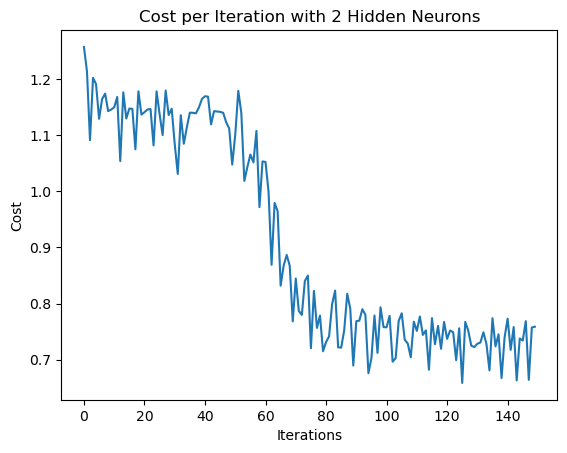

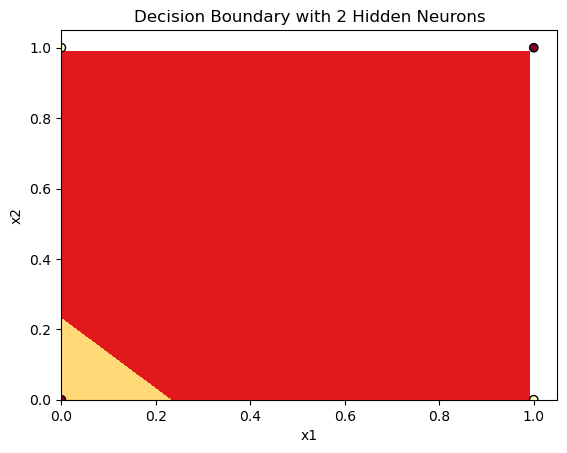

In [72]:
# Stochastic Gradient Descent
for epoch in range(k):
    cost_sum = 0

    # Shuffle training example
    index = np.arange(len(X))
    np.random.shuffle(index)
    X_shuffled = X[index]
    y_shuffled = y_encoding[index]

    for i in range(len(X_shuffled)):
        # Forward propagation
        input_layer = X_shuffled[i]
        hidden_layer_input = np.dot(input_layer, W1)
        hidden_layer_output = sigmoid(hidden_layer_input)
        hidden_layer_output = np.insert(hidden_layer_output, 2, 1) 

        output_layer_input = np.dot(hidden_layer_output, W2)
        output_layer_output = sigmoid(output_layer_input)

        # Calculating error
        error = y_shuffled[i] - output_layer_output
        cost_sum += np.sum(np.abs(error))

        # Backpropagation
        output = error * sigmoid_derivative(output_layer_output)
        hidden_layer_delta = output.dot(W2.T) * sigmoid_derivative(hidden_layer_output)

        # Updating weights
        W2 += alpha * hidden_layer_output.reshape(-1, 1) * output
        W1 += alpha * input_layer.reshape(-1, 1) * hidden_layer_delta[:-1]

    # average cost for the epoch
    costs[epoch] = cost_sum / len(X_shuffled)

# Plot for the cost per iteration
plt.plot(range(k), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration with 2 Hidden Neurons')
plt.show()

# Plot for the decision boundary
h = 0.01
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# features matrix
feature_matrix = np.c_[xx.ravel(), yy.ravel()]
feature_matrix = np.insert(feature_matrix, 2, 1, axis=1)

# Forward propagation to predict classes for each pair of features
hidden_layer_prediction = sigmoid(np.dot(feature_matrix, W1))
hidden_layer_prediction = np.insert(hidden_layer_prediction, 2, 1, axis=1)
final_prediction = sigmoid(np.dot(hidden_layer_prediction, W2))

prediction_grid = np.argmax(final_prediction, axis=1).reshape(xx.shape)

# Plotting the decision boundary with distinct regions for each class
plt.contourf(xx, yy, prediction_grid, cmap=plt.cm.YlOrRd, levels=[-0.5, 0.5, 1.5], alpha=1)

scatter = plt.scatter(data['x1'], data['x2'], c=data['y'], cmap=plt.cm.YlOrRd, edgecolors='k')
scatter.set_cmap(plt.cm.YlOrRd_r)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with 2 Hidden Neurons')

plt.show()

- What is your understanding of the above figure?

The figure represents the result of training a neural network with 2 hidden neurons to solve the XOR problem. The contour plot shows the decision boundary, distinguishing different regions for each class. The scatter plot aligns with the expected class separation, indicating successful learning. The cost per iteration plot demonstrates a decreasing and suggesting the model's improvement over epochs. Overall, the neural network has learned to classify XOR truth table instances with 2 hidden neurons and 2 output classes.

- Do you think the output is correct, Justify your answer

Yes, the output appears correct. The decreasing trend in the cost per iteration plot indicates successful learning during the training process.
The decision boundary in the contour plot effectively separates different classes, and the scatter plot aligns with the expected class distribution for the XOR truth table.

# Train the Neural Network to Solve the XOR Problem using 8 Hidden Neurons

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR truth table data with two classes 0,1
data = {
    'x1': np.array([0, 0, 1, 1]),
    'x2': np.array([0, 1, 0, 1]),
    'y': np.array([0, 1, 1, 0]) 
}

# Initializing variables
np.random.seed(50)
k = 150
alpha = 5

# input matrix X
X = np.array([data['x1'], data['x2']]).T

X = np.insert(X, 2, 1, axis=1)

y_encoding = np.zeros((len(data['y']), 2))
y_encoding[np.arange(len(data['y'])), data['y']] = 1

# Initialize weight matrices W1 and W2 with 8 hidden neurons and 2 output neurons
W1 = 2 * np.random.random((3, 8)) - 1
W2 = 2 * np.random.random((9, 2)) - 1

costs = np.zeros(k)

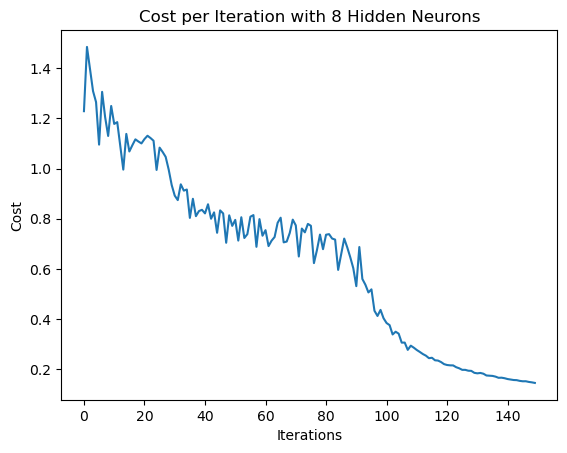

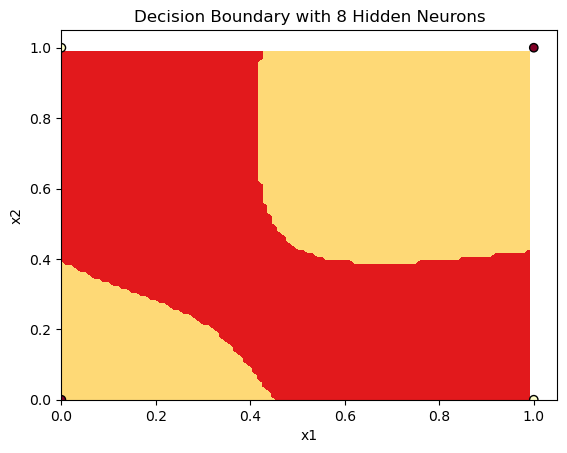

In [74]:
# Stochastic Gradient Descent
for epoch in range(k):
    cost_sum = 0

    # shuffle training examples
    index = np.arange(len(X))
    np.random.shuffle(index)
    X_shuffled = X[index]
    y_shuffled = y_encoding[index]

    for i in range(len(X_shuffled)):
        # Forward propagation
        input_layer = X_shuffled[i]
        hidden_layer_input = np.dot(input_layer, W1)
        hidden_layer_output = sigmoid(hidden_layer_input)
        hidden_layer_output = np.insert(hidden_layer_output, 8, 1)

        output_layer_input = np.dot(hidden_layer_output, W2)
        output_layer_output = sigmoid(output_layer_input)

        # Calculating error
        error = y_shuffled[i] - output_layer_output
        cost_sum += np.sum(np.abs(error))

        # Backpropagation
        output = error * sigmoid_derivative(output_layer_output)
        hidden_layer_delta = output.dot(W2.T) * sigmoid_derivative(hidden_layer_output)

        # Updating weights
        W2 += alpha * hidden_layer_output.reshape(-1, 1) * output
        W1 += alpha * input_layer.reshape(-1, 1) * hidden_layer_delta[:-1]

    # Calculate average cost for the epoch
    costs[epoch] = cost_sum / len(X_shuffled)

# Plot the cost per iteration
plt.plot(range(k), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration with 8 Hidden Neurons')
plt.show()

# Plot the decision boundary
h = 0.01
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# features matrix
feature_matrix = np.c_[xx.ravel(), yy.ravel()]
feature_matrix = np.insert(feature_matrix, 2, 1, axis=1)

# Forward propagation to predict classes for each pair of features
hidden_layer_prediction = sigmoid(np.dot(feature_matrix, W1))
hidden_layer_prediction = np.insert(hidden_layer_prediction, 8, 1, axis=1)
final_prediction = sigmoid(np.dot(hidden_layer_prediction, W2))

prediction_grid = np.argmax(final_prediction, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, prediction_grid, cmap=plt.cm.YlOrRd, levels=[-0.5,0.5,1.5], alpha=1)

scatter = plt.scatter(data['x1'], data['x2'], c=data['y'], cmap=plt.cm.YlOrRd, edgecolors='k')
scatter.set_cmap(plt.cm.YlOrRd_r)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with 8 Hidden Neurons')

plt.show()

- What is your understanding of the above figure?

The Cost Plot, acts like a scorecard for our neural network. It shows how much our network is improving its predictions as it learns from examples over time. As we can see the cost going down because that means our network is getting better at figuring out the right answers.

The decision boundary seems to be correctly capturing the XOR pattern. It separates the input space into regions corresponding to the XOR truth table classes.

- Do you think the output is correct, Justify your answer

Yes, The neural network well in learning the XOR problem, shown by a decreasing cost and a clear decision boundary in the plot. The scatter plot matches what we expect, confirming the model can classify XOR instances. It seems the network learned the XOR pattern.